In [1]:
import WSR98D


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/Users/xiaowu/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/cm.py:139: UserWarning: Trying to register the cmap 'pyart_NWSRef' which already exists.
  mpl.colormaps.register(name=full_name, cmap=cmap, force=True)
/Users/xiaowu/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/cm.py:139: UserWarning: Trying to register the cmap 'pyart_NWSVel' which already exists.
  mpl.colormaps.register(name=full_name, cmap=cmap, force=True)
/Users/xiaowu/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/cm.py:139: UserWarning: Trying to register the cmap 'pyart_NWS_SPW' which already exists.
  mpl.colormaps.register(name=full_name, cmap=cmap, force=True)
/Users/xiaowu/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/cm.py:139: UserWarning: Trying to register the cmap 'pyart_RefDiff' which already exists.
  mpl.colormaps.register(name=full_name, cmap=cmap, force=True)
/Users/xiaowu/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/cm.py:139: UserWarning: Trying to register the

In [2]:
import os
import matplotlib.pyplot as plt
import pyart

path = '/Users/xiaowu/Library/Mobile Documents/com~apple~CloudDocs/work/MeteoDataFusion'
infile = os.path.join(path,'test','data','Z9002.20220425.060745.AR2.bz2')
radar = WSR98D.WSR98DData(infile).data
compz = WSR98D.WSR98DData(infile).compz


In [3]:
print(radar.info)
for field_name in radar.fields.keys():
    print(field_name)


<bound method Radar.info of <pycwr.core.PyartRadar.Radar object at 0x7fc0605f89d0>>
velocity
spectrum_width
total_power
reflectivity
differential_reflectivity
cross_correlation_ratio
differential_phase
specific_differential_phase
horizontal_signal_noise_ratio


In [5]:
from pycwr.io import read_auto
PRD = read_auto(infile)
PyartRadar = PRD.ToPyartRadar()
#for field_name in PyartRadar.fields.keys():
#    print(field_name)
radar.fields.keys()

dict_keys(['velocity', 'spectrum_width', 'total_power', 'reflectivity', 'differential_reflectivity', 'cross_correlation_ratio', 'differential_phase', 'specific_differential_phase', 'horizontal_signal_noise_ratio'])

In [7]:
ref = radar.fields['reflectivity']['data']
ref.shape

(3261, 1320)

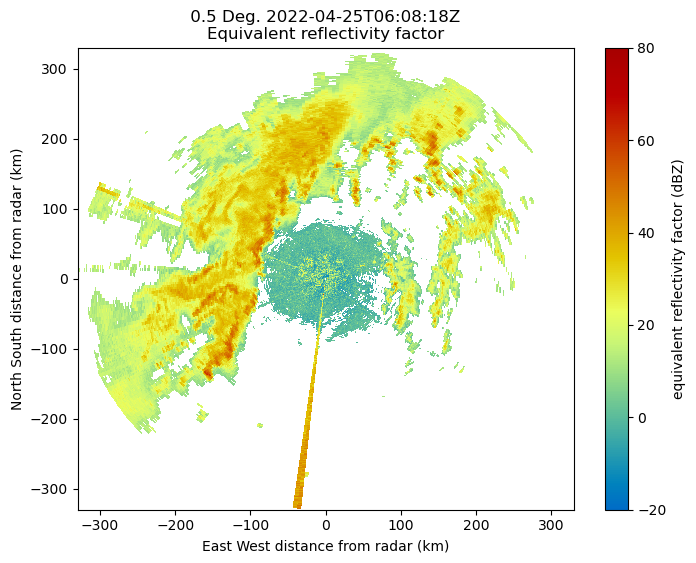

In [7]:
fig = plt.figure(figsize=(8,6))
ax  = plt.subplot(111)
composite_display = pyart.graph.RadarDisplay(radar)
composite_display.plot("reflectivity", ax=ax,
                       vmin=-20, vmax=80, cmap='pyart_HomeyerRainbow')


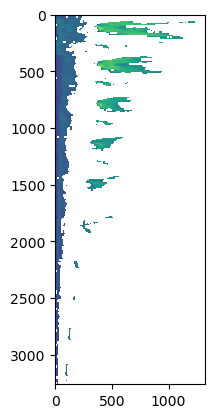

In [4]:
plt.imshow(radar.fields['reflectivity']['data'])
